In [1]:
import numpy as np
from keras.models import *
import glob
from keras.layers import Activation, Conv2D, Dropout, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline

C:\Python\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Data processing

In [2]:
def plots(ims, figsize=(12, 6), rows = 1):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0, 2, 3, 1))
    f = plt.figure(figsize = figsize)
    cols = len(ims) // rows if len(ims) % 2 == 0 else len(ims) // rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        plt.imshow(ims[i])

In [3]:
def create_generator(data_dir, batch_size, img_width, img_height,
                     rotation_range = 0, width_shift_range = 0,
                     height_shift_range = 0, shear_range = 0,
                     zoom_range = 0, horizontal_flip = False):
    
    datagen = ImageDataGenerator(
        rescale = 1./255, rotation_range = rotation_range, width_shift_range = width_shift_range,
        height_shift_range = height_shift_range, shear_range = shear_range, zoom_range = zoom_range,
        horizontal_flip = horizontal_flip)

    generator = datagen.flow_from_directory(
        data_dir, target_size = (img_width, img_height),
        batch_size = batch_size, class_mode = 'binary')

    return generator

Found 182 images belonging to 2 classes.


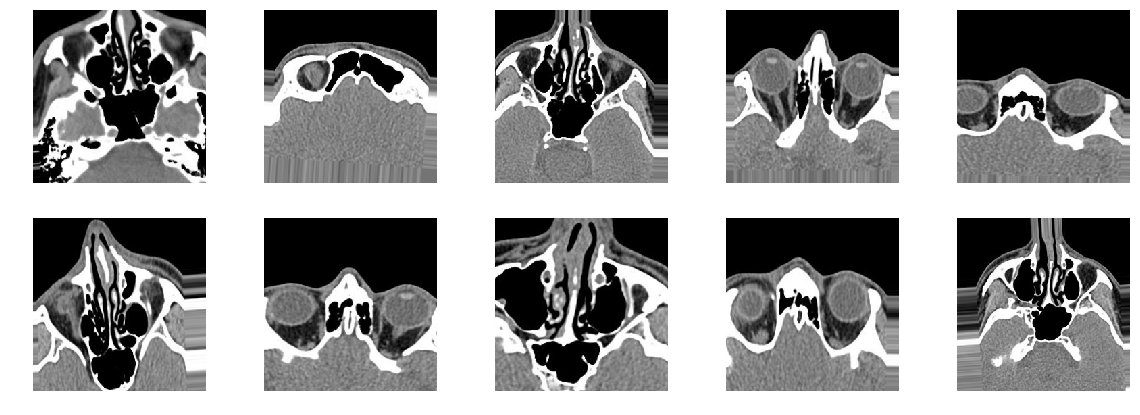

In [156]:
# data augmentation example
train_generator = create_generator(train_data_dir, batch_size,
                                       img_width, img_height, **generator_params)
aug_images = [next(train_generator)[0][0] for i in range(10)]
plots(aug_images, figsize=(20,7), rows=2)

# Model

In [24]:
def get_model(img_width, img_height):
    model = Sequential()
    model.add(Conv2D(32, 11 ,activation = 'relu', input_shape = (img_width, img_height, 3)))
    model.add(MaxPooling2D(pool_size=(3,3)))

    model.add(Conv2D(64, 3 ,activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, 3 ,activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, 3 ,activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    # model.add(Dropout(0.2))
    model.add(Dense(256, activation = 'relu'))
    # model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
        optimizer='rmsprop',
        metrics=['accuracy'])
    return model

In [196]:
def create_logs(path, name, accuracy, img_width, img_height,
                epochs, batch_size, data_augmentation = False):
    info = ("number of epochs = " + str(epochs) + "\nbatch_size = " +
            str(batch_size) + "\nimage size = (" + str(img_width) + "," +
            str(img_height) + ")\n" + "data augmentation = " +
            str(data_augmentation) + "\naccuracy = " + str(accuracy) )
    
    return info

In [198]:
print(create_logs("Asd", "Asd", 3.123123, img_width, img_height,
                epochs, batch_size, data_augmentation = False))

number of epochs = 30
batch_size = 4
image size = (256,256)
data augmentation = False
accuracy = 3.123123


# Main

In [187]:
model.evaluate_generator(validation_generator, nb_validation_samples/batch_size)

[0.22579369739426625, 0.9166666666666666]

In [188]:
model.metrics_names

['loss', 'acc']

In [ ]:
img_width = 512
img_height = 512

train_data_dir = 'dataset_classification/1/train'
validation_data_dir = 'dataset_classification/1/validation'
nb_train_samples = 182 #1160  
nb_validation_samples = 48 #370
epochs = 40
batch_size = 4
without_augmentation = True
generator_params = {"rotation_range" : 10, "width_shift_range" : 0.2,
                    "height_shift_range" : 0.2, "shear_range" : 0.2,
                    "zoom_range" : 0.3, "horizontal_flip" : True}

In [142]:
img_width = 256
img_height = 256

train_data_dir = 'dataset_classification/2/train'
validation_data_dir = 'dataset_classification/2/validation'
nb_train_samples = 182# 1160  
nb_validation_samples = 48#370
epochs = 30
batch_size = 4
without_augmentation = True
generator_params = {"rotation_range" : 5, "width_shift_range" : 0.1,
                    "height_shift_range" : 0.1, "shear_range" : 0.1,
                    "zoom_range" : 0.2, "horizontal_flip" : True}

In [20]:
model = get_model(img_width, img_height)

if without_augmentation:
    train_generator = create_generator(train_data_dir, batch_size,
                                       img_width, img_height)
else:
    train_generator = create_generator(train_data_dir, batch_size,
                                       img_width, img_height, **generator_params)
    
validation_generator = create_generator(validation_data_dir, batch_size, img_width, img_height)

model.fit_generator(
        train_generator, steps_per_epoch = nb_train_samples // batch_size,
        epochs = epochs, validation_data = validation_generator,
        validation_steps = nb_validation_samples // batch_size)

Found 182 images belonging to 2 classes.
Found 48 images belonging to 2 classes.
Epoch 1/30
45/45 [==============================] - 51s 1s/step - loss: 1.5595 - acc: 0.5724 - val_loss: 0.6612 - val_acc: 0.5417
Epoch 2/30
45/45 [==============================] - 55s 1s/step - loss: 0.7193 - acc: 0.7222 - val_loss: 0.4844 - val_acc: 0.7917
Epoch 3/30
45/45 [==============================] - 54s 1s/step - loss: 0.3762 - acc: 0.8222 - val_loss: 0.3850 - val_acc: 0.7292
Epoch 4/30
45/45 [==============================] - 54s 1s/step - loss: 0.3230 - acc: 0.8722 - val_loss: 0.2894 - val_acc: 0.9167
Epoch 5/30
45/45 [==============================] - 53s 1s/step - loss: 0.3268 - acc: 0.9166 - val_loss: 0.3087 - val_acc: 0.9167
Epoch 6/30
45/45 [==============================] - 53s 1s/step - loss: 0.2872 - acc: 0.8944 - val_loss: 0.5543 - val_acc: 0.8333
Epoch 7/30
45/45 [==============================] - 54s 1s/step - loss: 0.1425 - acc: 0.9667 - val_loss: 0.8459 - val_acc: 0.8125
Epoch 8/3